<a href="https://colab.research.google.com/github/Oktavian19/ML_2025/blob/main/JS07/JS07_TugasPraktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Praktikum: Multiple Linear Regression (Medical Cost Personal Datasets)

Bagian dari tugas praktikum Multiple Linear Regression (dan perbandingan dengan SVR) menggunakan dataset *Medical Cost Personal Datasets*.

### Langkah-langkah
1. Deskripsi singkat dataset
2. EDA (exploratory data analysis) dan visualisasi
3. Preprocessing (encoding, feature scaling bila perlu)
4. Split data train/test
5. Membangun model Multiple Linear Regression
6. Evaluasi (R², MSE, MAE) dan visualisasi hasil
7. Analisis hasil


In [6]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [8]:
df = pd.read_csv("/content/drive/MyDrive/asset/ml/insurance.csv")
print("Jumlah data:", df.shape)
df.head()

Jumlah data: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


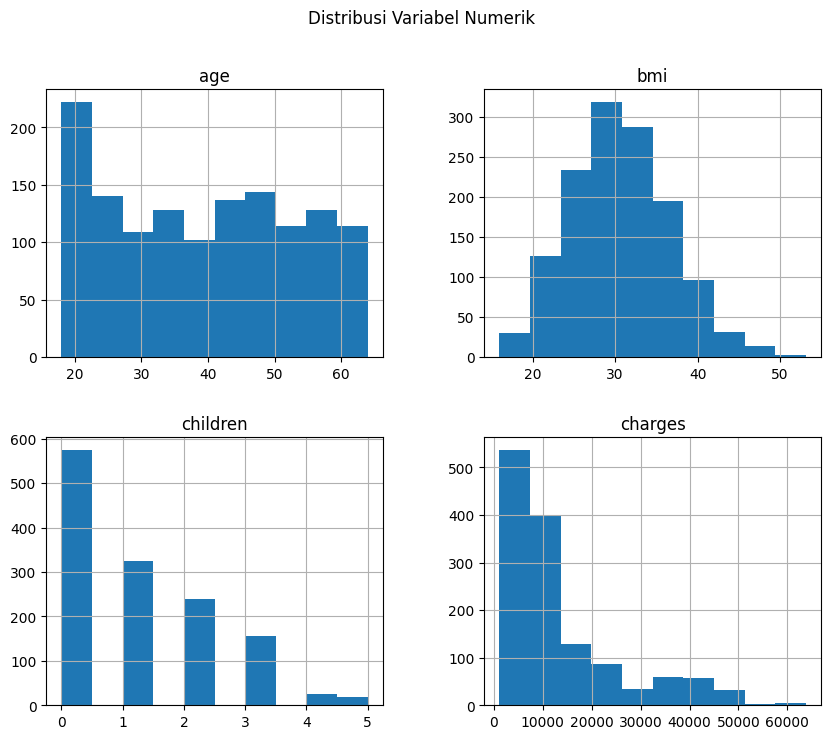

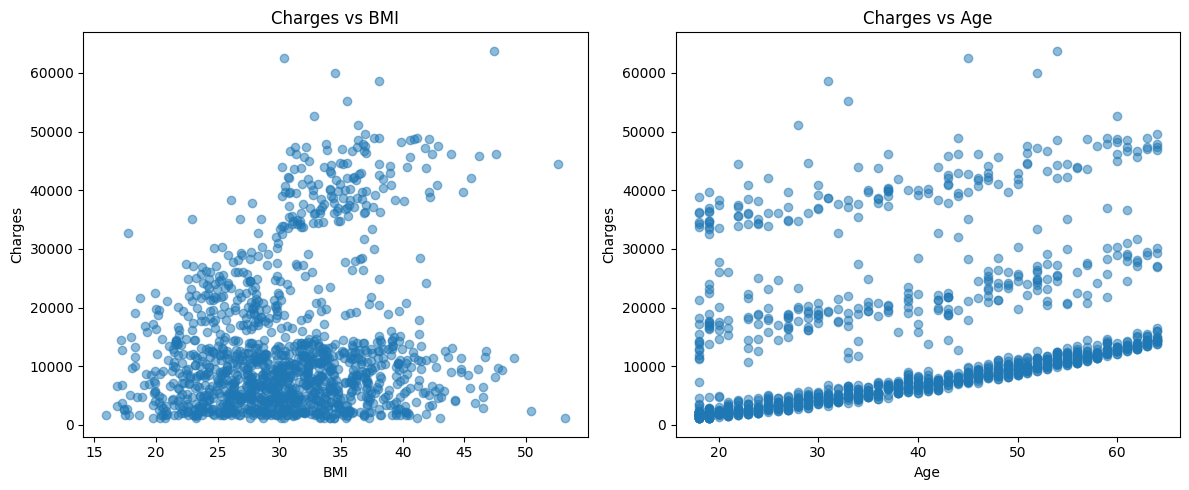

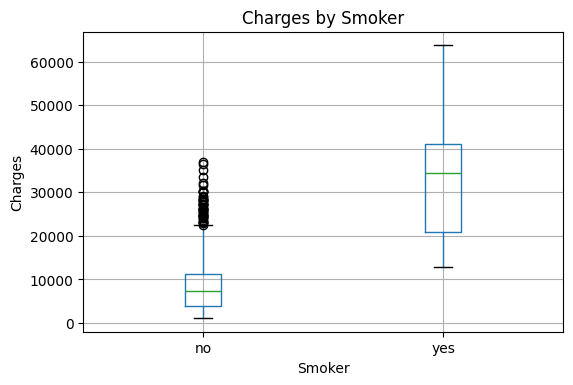

In [10]:
# Histogram variabel numerik
numeric_cols = ['age','bmi','children','charges']
df[numeric_cols].hist(figsize=(10,8))
plt.suptitle('Distribusi Variabel Numerik')
plt.show()

# Scatter plot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(df['bmi'], df['charges'], alpha=0.5)
plt.xlabel('BMI'); plt.ylabel('Charges'); plt.title('Charges vs BMI')
plt.subplot(1,2,2)
plt.scatter(df['age'], df['charges'], alpha=0.5)
plt.xlabel('Age'); plt.ylabel('Charges'); plt.title('Charges vs Age')
plt.tight_layout(); plt.show()

# Boxplot smoker
df.boxplot(column='charges', by='smoker', figsize=(6,4))
plt.title('Charges by Smoker')
plt.suptitle('')
plt.xlabel('Smoker'); plt.ylabel('Charges')
plt.show()

In [12]:
X = df.drop(columns=['charges'])
y = df['charges']

numeric_feat = ['age','bmi','children']
categorical_feat = ['sex','smoker','region']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_feat),
    ('cat', OneHotEncoder(drop='first'), categorical_feat)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)


Train shape: (1070, 6) Test shape: (268, 6)


R-squared: 0.7836
MSE: 33596915.85
MAE: 4181.19


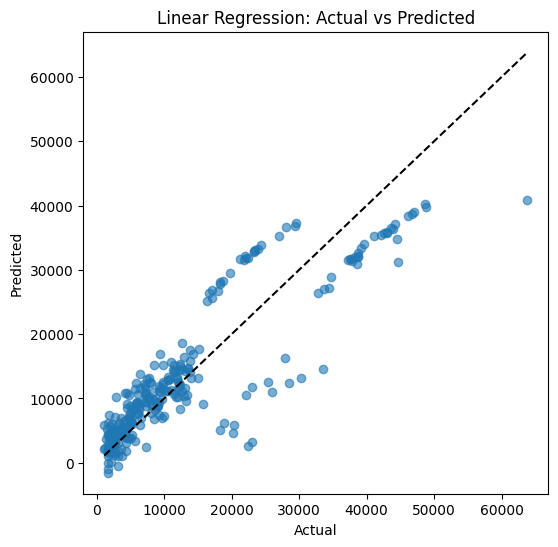

In [13]:
lr_pipeline = Pipeline([('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

lr_pipeline.fit(X_train, y_train)
y_pred = lr_pipeline.predict(X_test)

# Plot actual vs predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual'); plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

In [ ]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R-squared: {r2:.4f}\nMSE: {mse:.2f}\nMAE: {mae:.2f}')


### Analisis
- Model berhasil memprediksi biaya medis berdasarkan usia, BMI, anak, jenis kelamin, status perokok, dan wilayah.
- Nilai **R²** menunjukkan seberapa besar variasi target dijelaskan model.
- Fitur `smoker` biasanya memiliki pengaruh terbesar terhadap `charges`.
- Model dapat ditingkatkan dengan tuning hyperparameter atau model non-linear seperti SVR atau RandomForest.
